In [2]:
import autoencodeSVJ.utils as utils
import autoencodeSVJ.evaluate as ev

In [3]:
e = ev.ae_evaluation(utils.summary().iloc[20].filename)
self = e

found 1 matches with search '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/data/summary/hlf_eflow3_16_v0.summary'
/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/data/training_runs/hlf_eflow3_16_v0
h5_elt 'metric_names' :: loading dataset 'data/metric_names' from file 'hlf_eflow3_16_v0.h5'
h5_elt 'training' :: loading dataset 'params/training' from file 'hlf_eflow3_16_v0.h5'
h5_elt 'config' :: loading dataset 'params/config' from file 'hlf_eflow3_16_v0.h5'
h5_elt 'loss' :: loading dataset 'metric_names/loss' from file 'hlf_eflow3_16_v0.h5'
h5_elt 'lr' :: loading dataset 'metric_names/lr' from file 'hlf_eflow3_16_v0.h5'
h5_elt 'val_loss' :: loading dataset 'metric_names/val_loss' from file 'hlf_eflow3_16_v0.h5'
train_shell :: using saved model


In [4]:
# e.recon(split_by_leading_jet=1, qcd=0, cols=4, normed=1, bins=50)

In [5]:
# e.error(split_by_leading_jet=True, bins=80, rng=((0., 0.012), (0, 0.1)), yscale='linear', normed=1)

In [198]:
import pandas as pd

self = e
def grab_jet_tags(
    self,
    error_threshold,
    error_metric="mae",
):
    stag = [err[error_metric] > error_threshold for err in self.signal_err_jets]
    qtag = [err[error_metric] > error_threshold for err in self.qcd_err_jets]
    

    qcd_tag_idx = get_event_index(qtag)
#     return qcd_tag_idx, qtag
    qcd_tag_data = [q.loc[qcd_tag_idx + i] for i,q in enumerate(qtag)]
    
    qcd_jet_tags = utils.data_table(
        pd.DataFrame(
            np.asarray(qcd_tag_data).T,
            columns=['jet {}'.format(i) for i in range(len(qtag))],
            index=qcd_tag_idx/2,
        ),
        name='qcd jet tags',
    )
    
    signal_tag_idx = get_event_index(stag)
    signal_tag_data = [s.loc[signal_tag_idx + i] for i,s in enumerate(stag)]

    signal_jet_tags = utils.data_table(
        pd.DataFrame(
            np.asarray(signal_tag_data).T,
            columns=['jet {}'.format(i) for i in range(len(stag))],
            index=signal_tag_idx/2,
        ),
        name='signal jet tags',
    )
    
    return signal_jet_tags, qcd_jet_tags
    
def get_event_index(jet_tags):
    """Get all events index ids from a list of N jet tags 
    in which all N jets originated from that event.
    """
    assert len(jet_tags) > 0
    ret = set(jet_tags[0].index)
    to_add = jet_tags[1:]
    
    for i,elt in enumerate(to_add):
        ret = ret.intersection(elt.index - i - 1)
    
    return np.sort(np.asarray(list(ret)))

def tagged_jet_dict(tags):
    """Dictionary tags
    """
    return dict(
        [
            (
                i,
                tags[tags.sum(axis=1) == i].index
            ) for i in range(tags.shape[1] + 1)
        ]
    )

In [199]:
signal_tags, qcd_tags = grab_jet_tags(e, 0.02)

In [210]:
sdict = tagged_jets(signal_tags)
qdict = tagged_jets(qcd_tags)

In [213]:
qdict

{0: Int64Index([   41,    55,    63,    85,   142,   195,   204,   251,   279,
               292,
             ...
             51261, 51290, 51294, 51311, 51406, 51464, 51547, 51573, 51602,
             51625],
            dtype='int64', length=1185),
 1: Int64Index([  773,  2740,  2956,  4017,  4455,  5738,  6101,  7248,  7830,
              8151,  8684, 10569, 11390, 11844, 15131, 17093, 17163, 17676,
             17968, 19307, 19988, 20047, 20394, 24075, 24642, 24840, 26729,
             27473, 30754, 30908, 32256, 32947, 34396, 34961, 35171, 35495,
             36581, 37935, 38894, 39921, 40284, 41654, 42784, 44151, 44201,
             45219, 45240, 46592, 46731, 47600, 48155, 49310, 50227, 50646,
             51133],
            dtype='int64'),
 2: Int64Index([10765, 24651, 31472, 40450, 48810], dtype='int64')}

In [29]:
[i.index for i in self.qcd_jets]

[RangeIndex(start=0, stop=103416, step=2),
 RangeIndex(start=1, stop=103416, step=2)]

data_table :: plotting distrubution(s) for table(s) ['qcd test norm error jet 0', 'qcd test norm error jet 1', 'signal norm error jet 0', 'signal norm error jet 1']


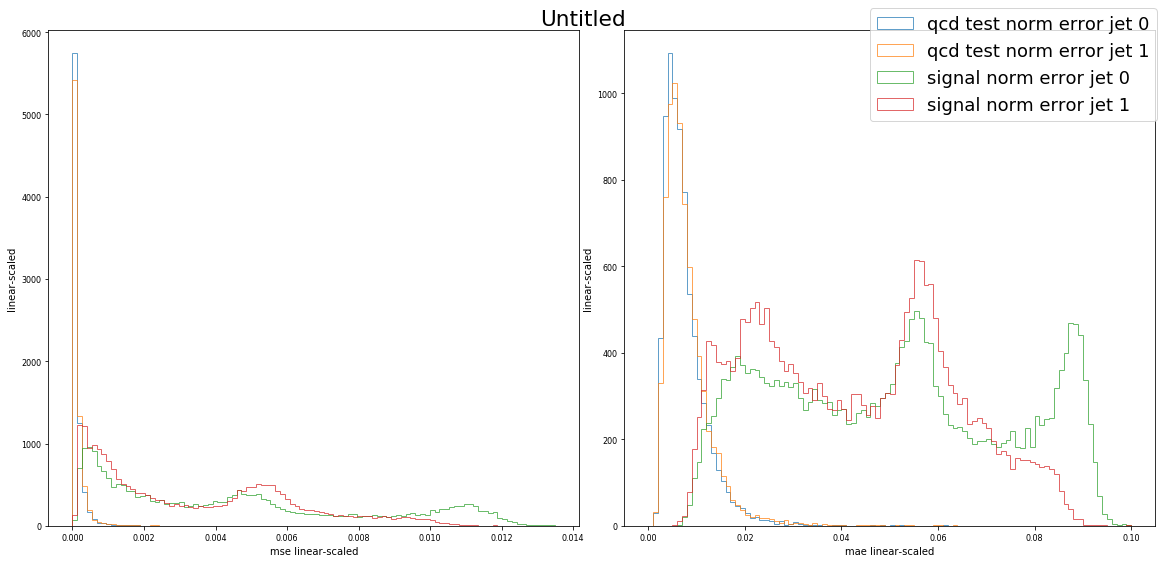

In [7]:
# even = self.qcd_err.index[self.qcd_err.index % 2 == 1]
# # self.test.loc[even].isin(self.qcd_jets[0].df).any().any()

# qcd_err_jets = [utils.data_table(self.qcd_err.loc[self.qcd_err.index % 2 == i], name=self.qcd_err.name + " jet " + str(i)) for i in range(2)]
# qcd_err_jets[0].plot(qcd_err_jets[1:] + , bins=100, rng=((0, 0.0018), (0, 0.035)), yscale='linear')
# # len(self.qcd_jets[0].df.merge(self.test.loc[even])), len(self.qcd_jets[0].df),b


# # self.qcd_jets[0]

e.qcd_err_jets[0].plot(e.qcd_err_jets[1:] + e.signal_err_jets, bins=100, normed=0, rng=((0., 0.0135), (0., 0.10)), figloc='upper right')

In [12]:
e.signal_err_jets

(mse    0.000140
 mae    0.007805
 dtype: float64, mse    0.003966
 mae    0.046681
 dtype: float64)

In [30]:
set(qcd_err_jets[0].index).issubset(self.qcd_jets[0].index)

True

In [63]:
self.test_norm.head()
self.test.head()

,Eta,Phi,Pt,M,ChargedFraction,PTD,Axis2,eflow 1,eflow 2,eflow 3,eflow 4,eflow 5,eflow 6,eflow 7,eflow 8,eflow 9,eflow 10,eflow 11,eflow 12
11473,0.279194,-3.124665,227.978226,12.155066,0.636364,0.560756,0.019177,0.148638,0.077757,0.049792,0.047785,0.029303,0.011031,0.025660,0.009746,0.022093,0.011558,0.007103,0.003284
67011,-0.365381,-2.736922,528.548706,55.349251,0.692308,0.396036,0.015474,0.173066,0.080904,0.045687,0.051086,0.027370,0.011200,0.023123,0.011086,0.029952,0.014002,0.008841,0.005184
100583,-0.436946,2.550648,403.285614,23.360142,0.486486,0.260631,0.038981,0.149740,0.065865,0.042765,0.042759,0.025470,0.010638,0.022343,0.008855,0.022422,0.009863,0.006403,0.003357
1196,0.920944,-0.839165,597.276062,19.856646,0.730769,0.279732,0.013593,0.072548,0.026471,0.015859,0.015560,0.008741,0.002153,0.008054,0.001722,0.005263,0.001920,0.001129,0.000382
55812,-0.022272,-2.674229,993.165161,17.288961,0.421053,0.518231,0.003786,0.027088,0.006766,0.003419,0.003695,0.001788,0.000215,0.001715,0.000165,0.000734,0.000183,0.000100,0.000020


In [6]:
self.qcd.head()

,Eta,Phi,Pt,M,ChargedFraction,PTD,Axis2,eflow 1,eflow 2,eflow 3,eflow 4,eflow 5,eflow 6,eflow 7,eflow 8,eflow 9,eflow 10,eflow 11,eflow 12
0,-1.255800,2.769187,1219.611084,33.835587,0.500000,0.766107,0.002672,0.048871,0.020929,0.012785,0.011471,0.006821,0.001121,0.006441,0.000897,0.002388,0.001023,0.000561,0.000117
1,0.222360,-0.627597,621.649109,68.852577,0.702703,0.340782,0.021546,0.141673,0.054214,0.027236,0.034836,0.016353,0.006979,0.013954,0.006400,0.020071,0.007681,0.004935,0.002844
2,-0.748598,2.674180,620.846252,30.894674,0.666667,0.420807,0.012104,0.103084,0.034401,0.018614,0.021581,0.010671,0.003609,0.009488,0.003080,0.010626,0.003546,0.002225,0.001095
3,-0.498147,-0.677491,574.233154,25.975536,0.774194,0.423551,0.013173,0.102151,0.037245,0.020274,0.023045,0.011651,0.003926,0.010399,0.003320,0.010435,0.003805,0.002354,0.001066
4,-0.310520,0.128936,1104.306885,38.129219,0.562500,0.531367,0.010377,0.053204,0.014944,0.008513,0.008661,0.004593,0.000905,0.004295,0.000714,0.002831,0.000795,0.000461,0.000151


In [7]:
self.qcd_jets[0].head()

,Eta,Phi,Pt,M,ChargedFraction,PTD,Axis2,eflow 1,eflow 2,eflow 3,eflow 4,eflow 5,eflow 6,eflow 7,eflow 8,eflow 9,eflow 10,eflow 11,eflow 12
0,-1.255800,2.769187,1219.611084,33.835587,0.500000,0.766107,0.002672,0.048871,0.020929,0.012785,0.011471,0.006821,0.001121,0.006441,0.000897,0.002388,0.001023,0.000561,0.000117
2,-0.748598,2.674180,620.846252,30.894674,0.666667,0.420807,0.012104,0.103084,0.034401,0.018614,0.021581,0.010671,0.003609,0.009488,0.003080,0.010626,0.003546,0.002225,0.001095
4,-0.310520,0.128936,1104.306885,38.129219,0.562500,0.531367,0.010377,0.053204,0.014944,0.008513,0.008661,0.004593,0.000905,0.004295,0.000714,0.002831,0.000795,0.000461,0.000151
6,-1.088647,3.043457,1024.016235,32.646732,0.615385,0.346517,0.012432,0.179892,0.114781,0.084402,0.066216,0.046723,0.011983,0.038606,0.014540,0.032361,0.020648,0.011912,0.005821
8,0.659574,1.234261,626.310608,37.720650,0.555556,0.354554,0.013142,0.275615,0.135101,0.075790,0.086747,0.045750,0.020282,0.032331,0.026055,0.075964,0.037236,0.023909,0.020937


In [8]:
import glob
d = utils.data_loader("test", verbose=0)
for f in glob.glob("../../../data/background/base_3/*.h5"):
    d.add_sample(f)

In [22]:
e.train.loc[11473]

KeyError: u'the label [11473] is not in the [index]'

In [10]:
ret[0]

,Eta,Phi,Pt,M,ChargedFraction,PTD,Axis2,Flavor,Energy
0,-1.255800,2.769187,1219.611084,33.835587,0.500000,0.766107,0.002672,2.0,2314.761321
2,-0.748598,2.674180,620.846252,30.894674,0.666667,0.420807,0.012104,4.0,803.678258
4,-0.310520,0.128936,1104.306885,38.129219,0.562500,0.531367,0.010377,3.0,1158.603828
6,-1.088647,3.043457,1024.016235,32.646732,0.615385,0.346517,0.012432,2.0,1693.486646
8,0.659574,1.234261,626.310608,37.720650,0.555556,0.354554,0.013142,2.0,768.482294
10,0.725087,0.915541,1098.689819,42.944641,0.545455,0.391961,0.009642,1.0,1401.044759
12,0.678032,-1.540407,950.050110,39.134548,0.567568,0.285633,0.014658,1.0,1177.577914
14,0.878632,0.956598,801.852844,36.553276,0.527778,0.304637,0.009349,2.0,1132.387395
16,0.045250,-0.892881,632.595093,35.376591,0.653061,0.229764,0.023151,4.0,634.230229
18,0.251520,-2.643799,521.500427,47.048683,0.476190,0.157597,0.039353,3.0,540.136171


In [11]:
j1.head() == self.qcd_jets[0].head()

NameError: name 'j1' is not defined

In [ ]:
utils.get_recon_errors([self.], self.ae)

In [ ]:
def error_from_un_normed()